In [220]:
using StockFlow
using StockFlow.Syntax

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams


In [221]:
display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>"1"));

## Defining the models

In [254]:
seir = @stock_and_flow begin
    
    :stocks
    S
    E
    I
    R
    D
    
    :parameters
    β
    σ
    μ
    γ
    
    :dynamic_variables
    fexpose_u=β*S*I
    finfect_u=E*σ
    fdeath_u=I*μ
    frecover_u=R*γ
    
    :flows
    
    S => expose_u1(fexpose_u) => E
    I => expose_u2(fexpose_u) => I
    E => infect_u(finfect_u) => I
    I => recover_u(frecover_u)  => R
    I => death_u(fdeath_u) => D

    
end


StockAndFlowF {S:5, SV:0, LS:0, F:5, I:5, O:5, V:5, LV:5, LSV:0, P:4, LVV:1, LPV:4, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     E │
│ 3 │     I │
│ 4 │     R │
│ 5 │     D │
└───┴───────┘
┌───┬────┬───────────┐
│ F │ fv │     fname │
├───┼────┼───────────┤
│ 1 │  2 │ expose_u1 │
│ 2 │  2 │ expose_u2 │
│ 3 │  3 │  infect_u │
│ 4 │  5 │ recover_u │
│ 5 │  4 │   death_u │
└───┴────┴───────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
│ 2 │   2 │  3 │
│ 3 │   3 │  3 │
│ 4 │   4 │  4 │
│ 5 │   5 │  5 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   3 │  2 │
│ 3 │   2 │  3 │
│ 4 │   4 │  3 │
│ 5 │   5 │  3 │
└───┴─────┴────┘
┌───┬───────────────────┬─────┐
│ V │             vname │ vop │
├───┼───────────────────┼─────┤
│ 1 │ ##v_fexpose_u#317 │   * │
│ 2 │         fexpose_u │   * │
│ 3 │         finfect_u │   * │
│ 4 │          fdeath_u │   * │
│ 5 │        frecover_u │   * │
└───┴───────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   1 │           2 │
│  2 │   3 │   2 │           2 │
│  3 │   2 │   3 │           1 │
│  4 │   3 │   4 │           1 │
│  5 │   4 │   5 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬───────┐
│ P │ pname │
├───┼───────┤
│ 1 │     β │
│ 2 │     σ │
│ 3 │     μ │
│ 4 │     γ │
└───┴───────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            1 │
│   2 │    2 │    3 │            2 │
│   3 │    3 │    4 │            2 │
│   4 │    4 │    5 │            2 │
└─────┴──────┴──────┴──────────────┘

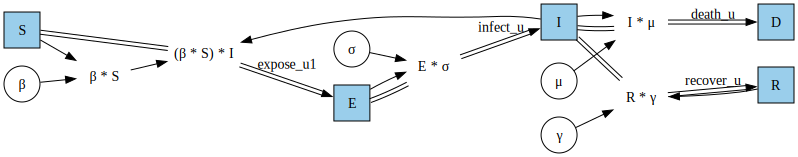

In [242]:
GraphF(seir)

In [243]:
vevr = @stock_and_flow begin
    
    :stocks
    V
    Ev
    R
    
    :parameters
    κ
    
    :dynamic_variables
    frecover_v=κ*Ev
    
    :flows
    Ev => recover_v(frecover_v) => R


    
end

StockAndFlowF {S:3, SV:0, LS:0, F:1, I:1, O:1, V:1, LV:1, LSV:0, P:1, LVV:0, LPV:1, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     V │
│ 2 │    Ev │
│ 3 │     R │
└───┴───────┘
┌───┬────┬───────────┐
│ F │ fv │     fname │
├───┼────┼───────────┤
│ 1 │  1 │ recover_v │
└───┴────┴───────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬────────────┬─────┐
│ V │      vname │ vop │
├───┼────────────┼─────┤
│ 1 │ frecover_v │   * │
└───┴────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   2 │   1 │           2 │
└────┴─────┴─────┴─────────────┘
┌───┬───────┐
│ P │ pname │
├───┼───────┤
│ 1 │     κ │
└───┴───────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            1 │
└─────┴──────┴──────┴──────────────┘

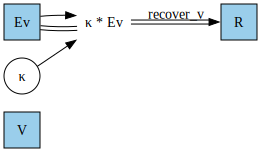

In [244]:
GraphF(vevr)

In [255]:
cross = @stock_and_flow begin
    
    :stocks
    S
    I
    V
    Ev
    
    :parameters
    α
    ϕ
    
    :dynamic_variables
    fexpose_v=α*V*I
    fsvax=ϕ*S
    
    :flows
    V => expose_v1(fexpose_v) => Ev
    I => expose_v2(fexpose_v) => I
    S => svax(fsvax) => V


end

StockAndFlowF {S:4, SV:0, LS:0, F:3, I:3, O:3, V:3, LV:3, LSV:0, P:2, LVV:1, LPV:2, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     V │
│ 4 │    Ev │
└───┴───────┘
┌───┬────┬───────────┐
│ F │ fv │     fname │
├───┼────┼───────────┤
│ 1 │  2 │ expose_v1 │
│ 2 │  2 │ expose_v2 │
│ 3 │  3 │      svax │
└───┴────┴───────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   2 │  2 │
│ 2 │   3 │  3 │
│ 3 │   1 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   3 │  1 │
│ 2 │   2 │  2 │
│ 3 │   1 │  3 │
└───┴─────┴────┘
┌───┬───────────────────┬─────┐
│ V │             vname │ vop │
├───┼───────────────────┼─────┤
│ 1 │ ##v_fexpose_v#319 │   * │
│ 2 │         fexpose_v │   * │
│ 3 │             fsvax │   * │
└───┴───────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   3 │   1 │           2 │
│  2 │   2 │   2 │           2 │
│  3 │   1 │   3 │           2 │
└────┴─────┴─────┴─────────────┘
┌───┬───────┐
│ P │ pname │
├───┼───────┤
│ 1 │     α │
│ 2 │     ϕ │
└───┴───────┘
┌─────┬───────┬───────┬───────────────┐
│ LVV │ lvsrc │ lvtgt │ lvsrcposition │
├─────┼───────┼───────┼───────────────┤
│   1 │     1 │     2 │             1 │
└─────┴───────┴───────┴───────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            1 │
│   2 │    2 │    3 │            1 │
└─────┴──────┴──────┴──────────────┘

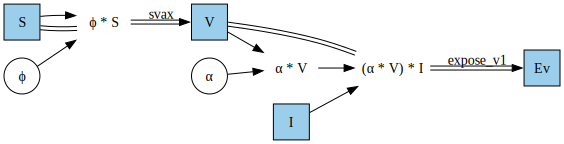

In [246]:
GraphF(cross)

### Composition

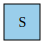

In [247]:
footS=foot(:S,(),())
GraphF(footS;schema="C0")

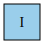

In [248]:
footI=foot(:I,(),())
GraphF(footI;schema="C0")

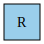

In [249]:
footR=foot(:R,(),())
GraphF(footR;schema="C0")

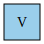

In [250]:
footV=foot(:V,(),())
GraphF(footV;schema="C0")

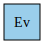

In [251]:
footEv=foot(:Ev,(),())
GraphF(footEv;schema="C0")

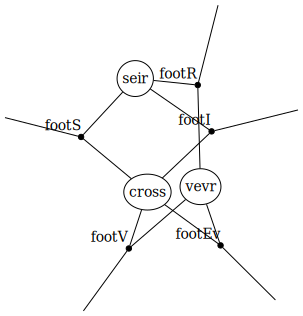

In [256]:
comp = @relation (footS, footI, footR, footEv, footV) begin
    seir(footS,footI,footR)
    vevr(footV,footEv,footR)
    cross(footS,footI,footEv,footV)
end;
display_uwd(comp)

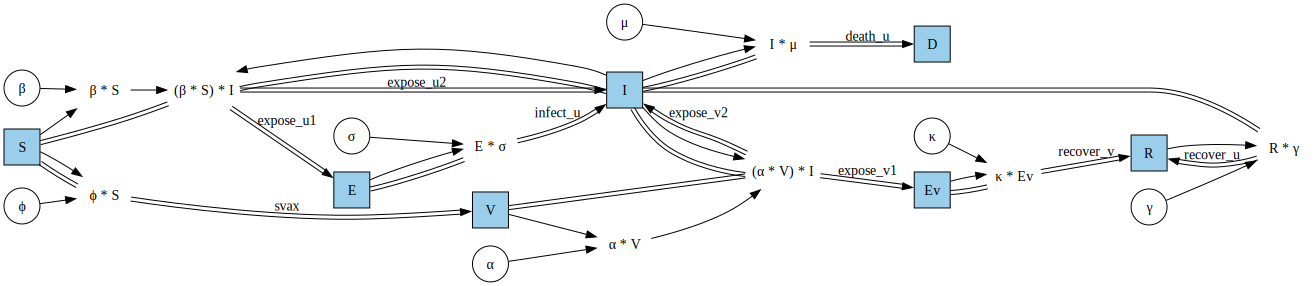

In [262]:
# Open three Stock and Flow Diagrams
openseird = Open(seir,footS,footI,footR)
openvevr = Open(vevr,footV,footEv,footR)
opencross = Open(cross,footS,footI,footEv,footV)
# Compose those three models according the UWD-algebra
openall = oapply(comp, [openseird, openvevr , opencross])
# Generate the composed model (Stock and Flow Diagram)
compos = apex(openall)

GraphF(compos)

### Stratification